In [ ]:
!pip3 install -U ucimlrepo
#!pip install --upgrade nbformat

In [ ]:
from ucimlrepo import fetch_ucirepo, list_available_datasets

# check which datasets can be imported
list_available_datasets()

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

In [ ]:
# import dataset
#diabetes_us = fetch_ucirepo(id=45)
diabetes_us = fetch_ucirepo(name='Diabetes 130-US Hospitals for Years 1999-2008')

# access data
X = diabetes_us.data.features
y = diabetes_us.data.targets
# train model e.g. sklearn.linear_model.LinearRegression().fit(X, y)

# access metadata
print(diabetes_us.metadata.uci_id)
print(diabetes_us.metadata.num_instances)
print(diabetes_us.metadata.additional_info.summary)

# access variable info in tabular format
print(diabetes_us.variables)


296
101766
The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.
(1)	It is an inpatient encounter (a hospital admission).
(2)	It is a diabetic encounter, that is, one during which any kind of diabetes was entered into the system as a diagnosis.
(3)	The length of stay was at least 1 day and at most 14 days.
(4)	Laboratory tests were performed during the encounter.
(5)	Medications were administered during the encounter.

The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab tests performed, HbA1c test result, diagnosis, number of medications, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalizati

/usr/local/lib/python3.12/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [ ]:
import plotly.express as px
import pandas as pd

In [ ]:
diabetes_df = pd.read_csv("https://archive.ics.uci.edu/static/public/296/data.csv", low_memory=False)
diabetes_df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
print(diabetes_df['time_in_hospital'].unique())
print(diabetes_df['age'].unique())
print(diabetes_df['race'].unique()) # we were thinking if we can get heights information based on race, but too many Other and NaN values hinders us from doing it

[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic']


In [ ]:
diabetes_df.shape

(101766, 50)

In [ ]:
diabetes_df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [ ]:
diabetes_df.dtypes

,0
encounter_id,int64
patient_nbr,int64
race,object
gender,object
age,object
weight,object
admission_type_id,int64
discharge_disposition_id,int64
admission_source_id,int64
time_in_hospital,int64


In [ ]:
diabetes_df[['gender', 'age']].value_counts().reset_index()

,gender,age,count
0,Female,[70-80),13985
1,Male,[70-80),12081
2,Male,[60-70),11421
3,Female,[60-70),11061
4,Female,[80-90),10515
5,Male,[50-60),8684
6,Female,[50-60),8572
7,Male,[80-90),6682
8,Male,[40-50),4874
9,Female,[40-50),4811


In [ ]:
diabetes_df.isnull().sum()

,0
encounter_id,0
patient_nbr,0
race,2273
gender,0
age,0
weight,98569
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0


In [ ]:
# calculate the missing ratio to see what data variables are useful
miss = diabetes_df.isna().mean().sort_values(ascending=False).to_frame("missing_ratio")
miss.head(15)

,missing_ratio
weight,0.968585
max_glu_serum,0.947468
A1Cresult,0.832773
medical_specialty,0.490822
payer_code,0.395574
race,0.022336
diag_3,0.013983
diag_2,0.003518
diag_1,0.000206
patient_nbr,0.000000


**Looking at the missing values ratio, we find out that the problematic variables (major missing data issues):**

* A1Cresult - 83.3% missing (only ~17% of data available)
* max_glu_serum - 94.7% missing (only ~5% of data available)
* weight - 96.9% missing (only ~3% of data available)

**Thus, we will not conduct analysis on these variables.**

In [ ]:
# value counts and ratios
target_counts = diabetes_df["readmitted"].value_counts(dropna=False)
target_ratio = (target_counts / len(diabetes_df)).round(3)

# rename before concat
target_counts = target_counts.rename("count")
target_ratio = target_ratio.rename("ratio")

# combine side by side
display(pd.concat([target_counts, target_ratio], axis=1))

,count,ratio
readmitted,,
NO,54864,0.539
>30,35545,0.349
<30,11357,0.112


In [ ]:
age_counts = diabetes_df['age'].value_counts().reset_index()
age_counts.columns = ['age', 'count']

fig = px.bar(age_counts, x='age', y='count', title='Number of Diabetes Patients in Different Age')
fig.show()

In [ ]:
# define the correct age bin order
age_order = ['[0-10)', '[10-20)', '[20-30)', '[30-40)',
             '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']

# re-count and reindex using the defined order
age_counts = diabetes_df['age'].value_counts().reindex(age_order).reset_index()
age_counts.columns = ['age', 'count']

# plot with Plotly Express
fig = px.bar(age_counts, x='age', y='count', title='Number of Diabetes Patients in Different Age')
fig.show()

Looking at the chart, we can see a clear trend that the chance of having diabetes increases with age, especially after 40,
and peaks between 60–80 years old. This shows a strong correlation between older age and higher risk of diabetes.

In [ ]:
# compute counts by gender and age
gender_age = diabetes_df.groupby(['age', 'gender']).size().reset_index(name='count')

# reindex age categories so they appear in correct order
gender_age['age'] = pd.Categorical(gender_age['age'], categories=age_order, ordered=True)

# plot stacked bar chart with Plotly Express
fig = px.bar(
    gender_age,
    x='age',
    y='count',
    color='gender',
    title='Nmber of Diabetes Patients by Age and Gender',
    category_orders={'age': age_order}  # ensures x-axis follows defined order
)
fig.show()

**Discovery on age and gender trend**

Both men and women follow the same age trend.

In most age groups, men and women have roughly equal distribution.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [ ]:
df = diabetes_df.copy()#as we need to add new feature to original dataset

# Binary target
df["readmit_30"] = (df["readmitted"] == "<30").astype(int)

# Length of stay bins (you can change edges later)
los_edges = [0, 3, 7, np.inf]   # 1–3=short, 4–7=medium, 8+=long (typical, interpretable)
los_labels = ["short (1–3)", "medium (4–7)", "long (8+)"]
df["los_bin"] = pd.cut(df["time_in_hospital"], bins=los_edges, labels=los_labels, right=True)

df[["readmitted", "readmit_30", "time_in_hospital", "los_bin"]].head(20)

,readmitted,readmit_30,time_in_hospital,los_bin
0,NO,0,1,short (1–3)
1,>30,0,3,short (1–3)
2,NO,0,2,short (1–3)
3,NO,0,2,short (1–3)
4,NO,0,1,short (1–3)
5,>30,0,3,short (1–3)
6,NO,0,4,medium (4–7)
7,>30,0,5,medium (4–7)
8,NO,0,13,long (8+)
9,NO,0,12,long (8+)


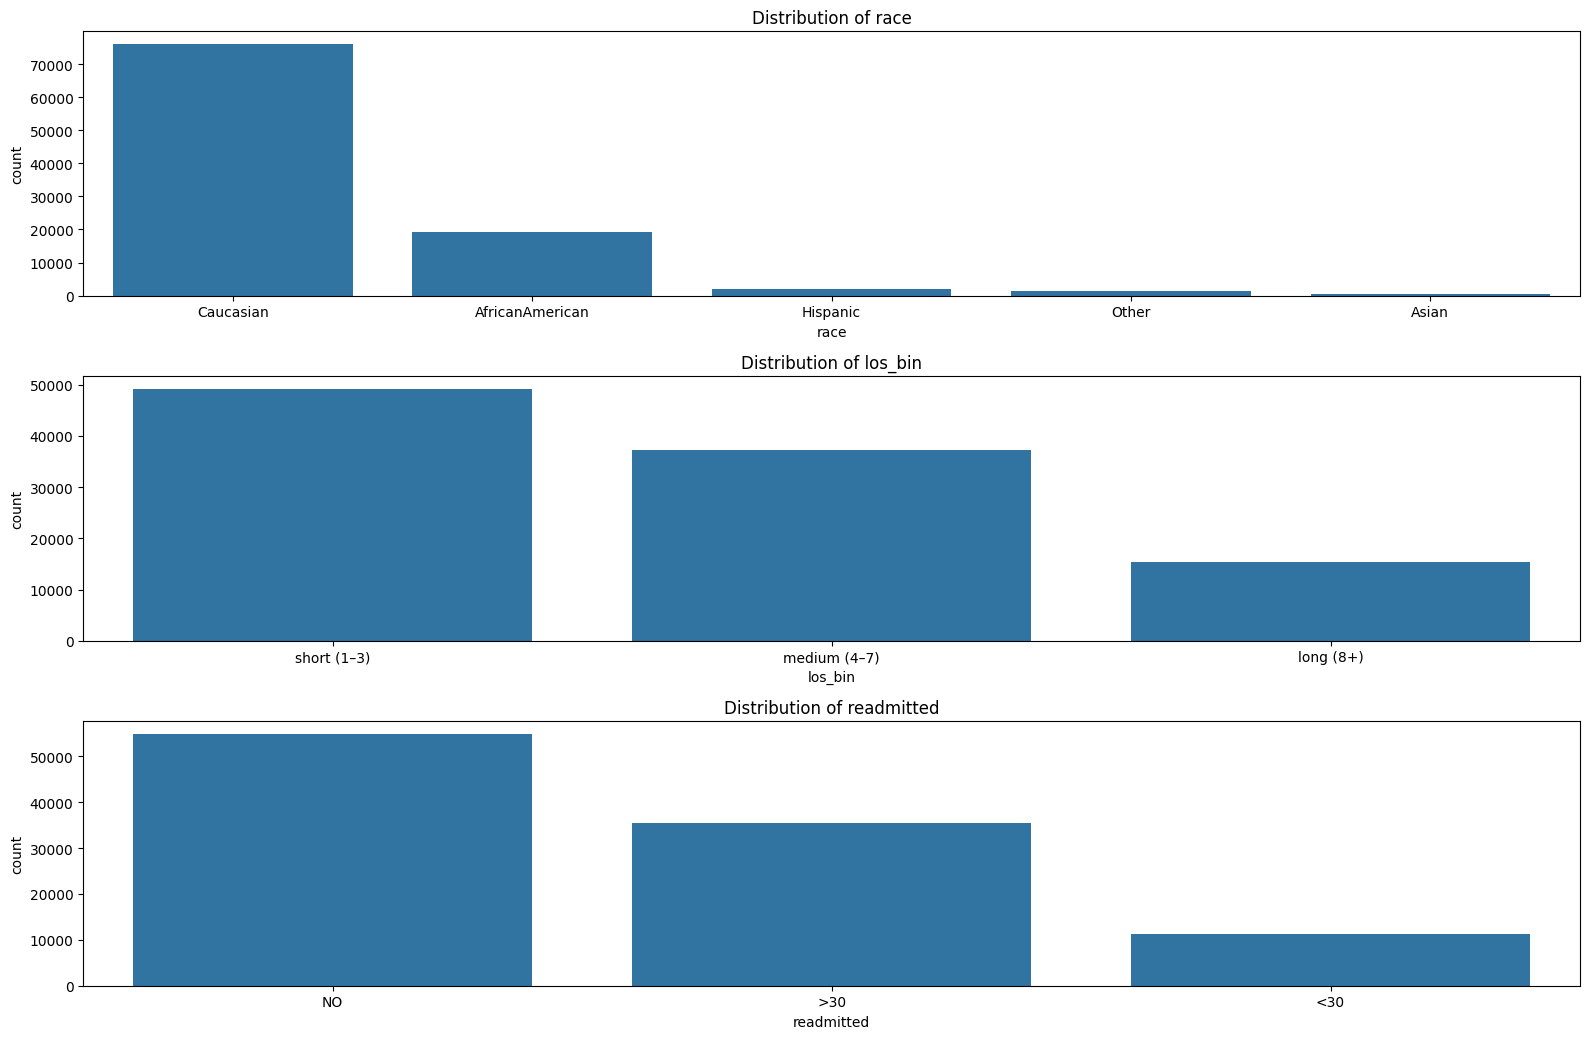

In [ ]:
cat_cols = ["race", "los_bin", "readmitted"]
n = len(cat_cols)
plt.figure(figsize=(16, 3.5*n))
for i,c in enumerate(cat_cols, 1):
    plt.subplot(n,1,i)
    order = df[c].value_counts().index
    sns.countplot(x=c, data=df, order=order)
    plt.title(f"Distribution of {c}")
    plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Race Distribution

Heavily skewed toward Caucasian patients at around 76,000 patients which represent the vast majority of the dataset

African American is the second largest group at ~20,000 patients

There are very small representation of Hispanic, Other, and Asian patients - (each <5,000 patients)

**This distribution reflects the higher prevalence of diabetes in Caucasian and African American populations, which aligns with known epidemiological patterns.**

##Length of Stay Distribution (los_bin)

Short stays (1-3 days) are most common (around 49,000 patients)

Medium stays (4-7 days) are also substantial (around 37,000 patients)

Long stays (8+ days) are least common (around 15,000 patients)

**This shows most patients have shorter hospital stays.**




##Readmission Distribution

"NO" readmissions are most frequent (around 54,000 patients)

"<30" (readmitted within 30 days) is significant (around 36,000 patients)

">30" (readmitted after 30 days) is least common (around 12,000 patients)

**The 30-day readmission rate appears quite high (around 35% of total), which could be a key focus for our analysis.**

In [ ]:
#Extract all the numerical values colomn and have a general overview
num_cols = ["time_in_hospital","num_lab_procedures","num_procedures","num_medications",
            "number_outpatient","number_emergency","number_inpatient","number_diagnoses"]

df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
time_in_hospital,101766.0,4.395987,2.985108,1.0,2.0,4.0,6.0,14.0
num_lab_procedures,101766.0,43.095641,19.674362,1.0,31.0,44.0,57.0,132.0
num_procedures,101766.0,1.339730,1.705807,0.0,0.0,1.0,2.0,6.0
num_medications,101766.0,16.021844,8.127566,1.0,10.0,15.0,20.0,81.0
number_outpatient,101766.0,0.369357,1.267265,0.0,0.0,0.0,0.0,42.0
number_emergency,101766.0,0.197836,0.930472,0.0,0.0,0.0,0.0,76.0
number_inpatient,101766.0,0.635566,1.262863,0.0,0.0,0.0,1.0,21.0
number_diagnoses,101766.0,7.422607,1.933600,1.0,6.0,8.0,9.0,16.0


## From here, we will look at what factors are related to readmission rates.

In [ ]:
age_table = (df.groupby("age")["readmit_30"].mean().sort_index())  # age bins already ordered
age_table = (100*age_table).round(2).rename("percentage_readmit_30")
age_table

,percentage_readmit_30
age,
[0-10),1.86
[10-20),5.79
[20-30),14.24
[30-40),11.23
[40-50),10.60
[50-60),9.67
[60-70),11.13
[70-80),11.77
[80-90),12.08


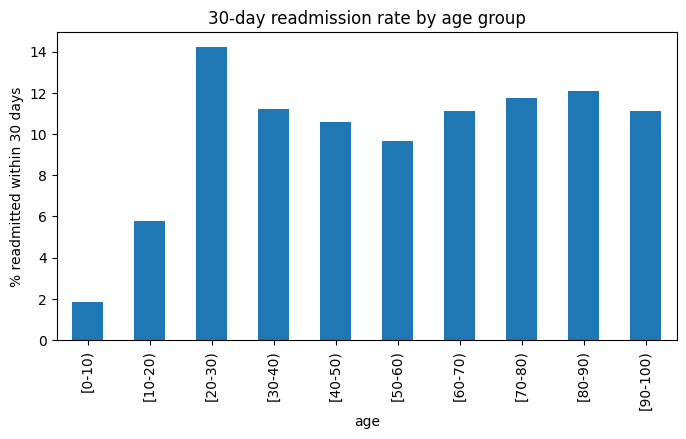

In [ ]:
plt.figure(figsize=(8,4))
age_table.plot(kind="bar")
plt.ylabel("% readmitted within 30 days")
plt.title("30-day readmission rate by age group")
plt.show()

**From above, we can see that [20-30) age group has the highest readmission rate at 14.24%, and this is significantly higher than all other groups.**

This is surprising but we think it's probably because of lifestyle factors or treatment adherence of young adults. But we are not able to derive further information from this dataset.

,% readmit<30 by gender
gender,
Female,11.25
Male,11.06
Unknown/Invalid,0.00


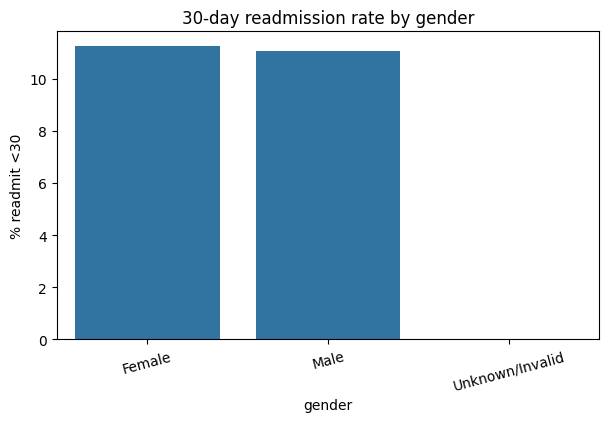

In [ ]:
#Explore the relationship between gender and readmission rates
col = "gender"
tab = (100*df.groupby(col)["readmit_30"].mean()).round(2).sort_values(ascending=False)
display(tab.rename(f"% readmit<30 by {col}"))
plt.figure(figsize=(7,4))
sns.barplot(x=tab.index, y=tab.values)
plt.ylabel("% readmit <30")
plt.title(f"30-day readmission rate by {col}")
plt.xticks(rotation=15)
plt.show()

**Currently seems like gender does not correlate to readmission rate..**

,% readmit<30 by race
race,
Caucasian,11.29
AfricanAmerican,11.22
Hispanic,10.41
Asian,10.14
Other,9.63


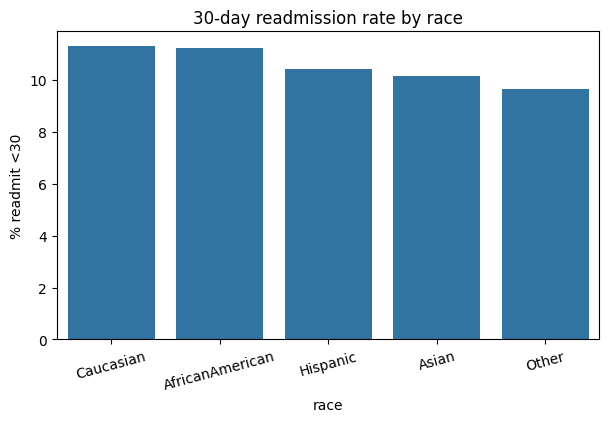

In [ ]:
#Explore the relationship between race and readmission rates
col = "race"
tab = (100*df.groupby(col)["readmit_30"].mean()).round(2).sort_values(ascending=False)
display(tab.rename(f"% readmit<30 by {col}"))
plt.figure(figsize=(7,4))
sns.barplot(x=tab.index, y=tab.values)
plt.ylabel("% readmit <30")
plt.title(f"30-day readmission rate by {col}")
plt.xticks(rotation=15)
plt.show()

From the chart above, we find out that there are small racial disparities regarding readmission rate.

Caucasian and African American patients have nearly identical readmission rates. This may suggest that readmission rates are relatively consistent across races. And hence, **race may not be a major predictor of 30-day readmission.**

Now, we will derive a heatmap of correlation to see which variables correlates to readmission rates.

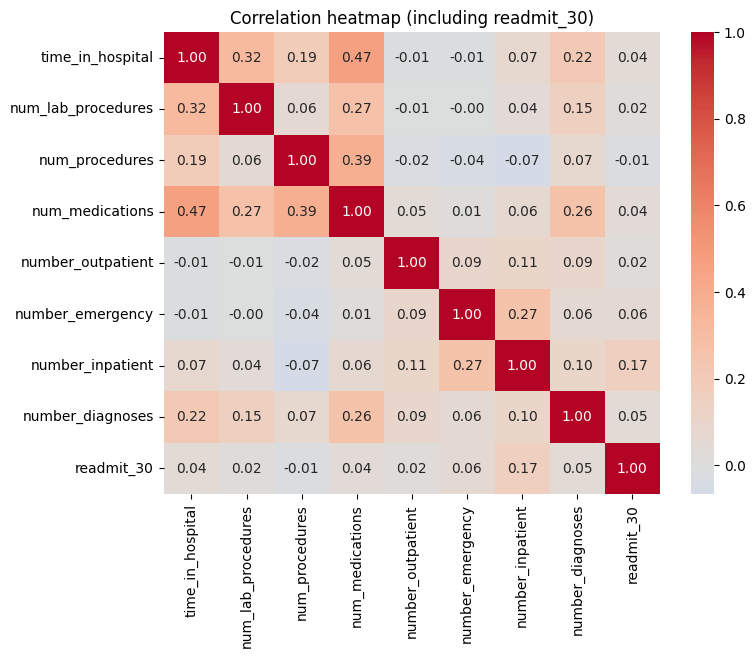

In [ ]:
# add readmission rates data into the numerical cols
num_cols = ["time_in_hospital","num_lab_procedures","num_procedures","num_medications",
            "number_outpatient","number_emergency","number_inpatient","number_diagnoses","readmit_30"]

corr = df[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation heatmap (including readmit_30)")
plt.show()

**We find out that all numerical features has negligible correlation with readmit_30...(all less than 0.2)**

## Next, we will apply feature engineering to explore.

In [ ]:
# First, we simplify the age group for better analysis and visualization
def simplify_age_group(age_str):
    if pd.isna(age_str):
        return "Unknown"
    age_num = int(age_str.split('-')[0].replace('[', ''))
    if age_num < 30:
        return "Young (<30)"
    elif age_num < 50:
        return "Middle (30-49)"
    elif age_num < 70:
        return "Older (50-69)"
    else:
        return "Elderly (70+)"

df["age_simplified"] = df["age"].apply(simplify_age_group)
df["age_simplified"].describe().T

,age_simplified
count,101766
unique,4
top,Elderly (70+)
freq,46058


In [ ]:
# re-count and reindex using the defined order
age_group_counts = df['age_simplified'].value_counts().reindex().reset_index()
age_group_counts.columns = ['age_simplified', 'count']

# plot with Plotly Express
fig = px.bar(age_group_counts, x='age_simplified', y='count', title='Number of Diabetes Patients in Different Age Group')
fig.show()

**We can clearly tell that the chance of diagonosing with diabetes is getting higher and higher with age increasing.**

In [ ]:
age_group_table = (df.groupby("age_simplified")["readmit_30"].mean().sort_index())  # age bins already ordered
age_group_table = (100*age_group_table).round(2).rename("percentage_readmit_30")
age_group_table

,percentage_readmit_30
age_simplified,
Elderly (70+),11.85
Middle (30-49),10.78
Older (50-69),10.49
Young (<30),11.12


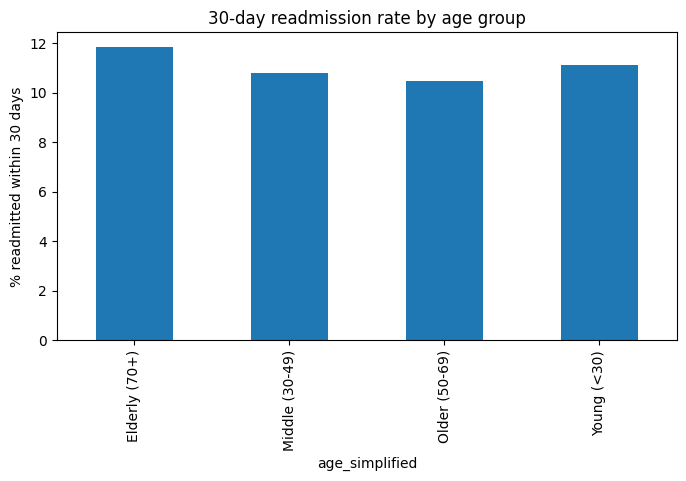

In [ ]:
plt.figure(figsize=(8,4))
age_group_table.plot(kind="bar")
plt.ylabel("% readmitted within 30 days")
plt.title("30-day readmission rate by age group")
plt.show()

Seems like the difference is not very significant among different age groups...
Only 1.5 percentage point difference between highest and lowest rates.

**While elderly patients have slightly higher readmission rates as expected, the relatively flat pattern across age groups indicates that age alone is not a major risk factor for 30-day readmissions in diabetes patients.**

In [ ]:
util_cols = ["number_outpatient","number_emergency","number_inpatient"]

sep_median = df.groupby("readmit_30")[util_cols].median().T
display(sep_median.rename(columns={0:"No <30 (median)", 1:"Yes <30 (median)"}))

readmit_30,No <30 (median),Yes <30 (median)
number_outpatient,0.0,0.0
number_emergency,0.0,0.0
number_inpatient,0.0,0.0



==== number_outpatient: readmission rate by bins ====


,count,%<30
number_outpatient_bin,,
0–0,85027,10.67
1–2,12141,13.87
3+,4313,13.03


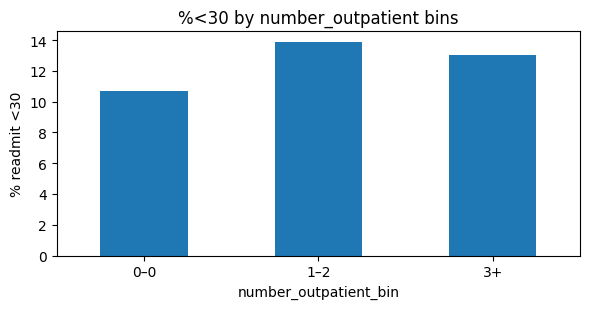


==== number_emergency: readmission rate by bins ====


,count,%<30
number_emergency_bin,,
0–0,90383,10.47
1–2,9719,15.18
3+,1541,24.53


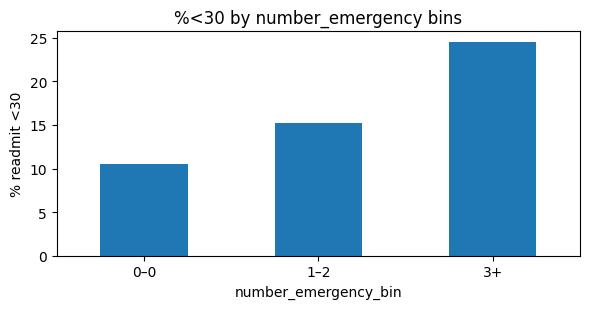


==== number_inpatient: readmission rate by bins ====


,count,%<30
number_inpatient_bin,,
0–0,67630,8.44
1–2,27087,14.18
3+,6855,24.87


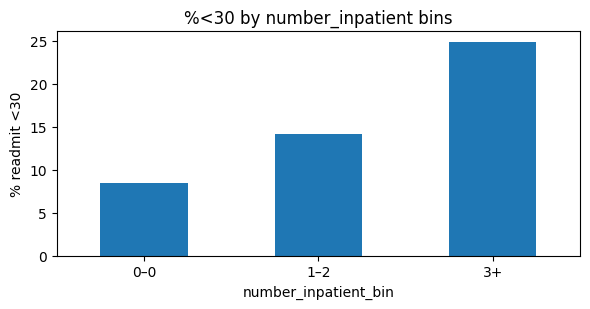

In [ ]:
bin_sets = {
    "number_outpatient":[0,1,3,10],   # 0, 1-3, >=4
    "number_emergency":[0,1,3,10],    # 0, 1-3, >=4
    "number_inpatient":[0,1,3,10]     # 0, 1-3, >=4
}

for col, edges in bin_sets.items():
    labels = [f"{edges[i]}–{edges[i+1]-1}" for i in range(len(edges)-2)] + [f"{edges[-2]}+"]
    df[f"{col}_bin"] = pd.cut(df[col], bins=edges, labels=labels, include_lowest=True, right=False)

    print(f"\n==== {col}: readmission rate by bins ====")
    rate = (100*pd.crosstab(df[f"{col}_bin"], df["readmit_30"], normalize="index")[1]).round(2)
    cnt  = df[f"{col}_bin"].value_counts()
    display(pd.DataFrame({"count": cnt, "%<30": rate}).fillna(0).sort_index())


    ax = (100*pd.crosstab(df[f"{col}_bin"], df["readmit_30"], normalize="index")[1]).plot(
        kind="bar", figsize=(6,3.2), rot=0, ylabel="% readmit <30", title=f"%<30 by {col} bins")
    plt.tight_layout(); plt.show()

From here, we can see that the 30-day readmission rate has strong positive relationship with num_emergency and num_inpatient.

## Next, we will create a new feature - mdeical complexity score to explore.

In [ ]:
#Medical complexity score
df["medical_complexity"] = (df["num_medications"] +
                           df["num_procedures"] +
                           df["num_lab_procedures"]) / 3

Text(0.5, 1.0, 'Medical Complexity by Age')

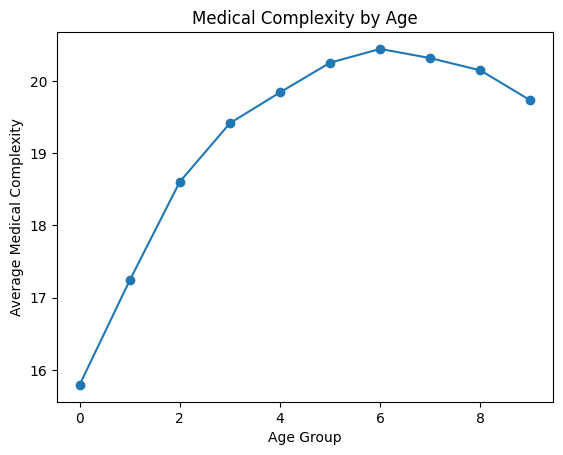

In [ ]:
age_complexity = df.groupby("age")["medical_complexity"].mean().reindex(age_order).dropna()
plt.plot(range(len(age_complexity)), age_complexity.values, marker='o')
plt.xlabel("Age Group")
plt.ylabel("Average Medical Complexity")
plt.title("Medical Complexity by Age")

Medical complexity follows a predictable age pattern, peaking in older adults but leveling off in the elderly, which may partially explain the relatively modest age-related differences in readmission rates.

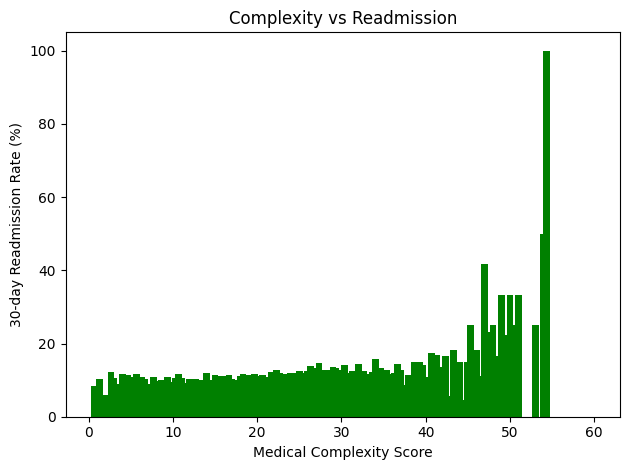

In [ ]:
complexity_readmit = df.groupby("medical_complexity")["readmit_30"].mean() * 100
plt.bar(complexity_readmit.index, complexity_readmit.values, color='green')
plt.xlabel("Medical Complexity Score")
plt.ylabel("30-day Readmission Rate (%)")
plt.title("Complexity vs Readmission")

plt.tight_layout()
plt.show()

We can see **strong positive relationship** between medical complexity and 30-day readmission rate! As medical complexity increases, readmission rates rise dramatically.

Medical complexity is a much stronger predictor of readmission than num_mediactes or num_procedures alone. The exponential relationship suggests that identifying and intensively **managing the small subset of highly complex patients could be an effective strategy for reducing readmissions.**

## Next, we will explore what are the predictors for length of stay.

In [ ]:
los_bin_counts = df["los_bin"].value_counts()

Text(0.5, 1.0, 'LOS Categories Distribution')

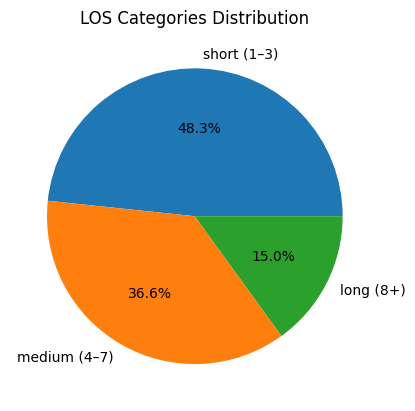

In [ ]:
#we display the distribution of los in pie chart
plt.pie(los_bin_counts.values, labels=los_bin_counts.index, autopct='%1.1f%%')
plt.title("LOS Categories Distribution")

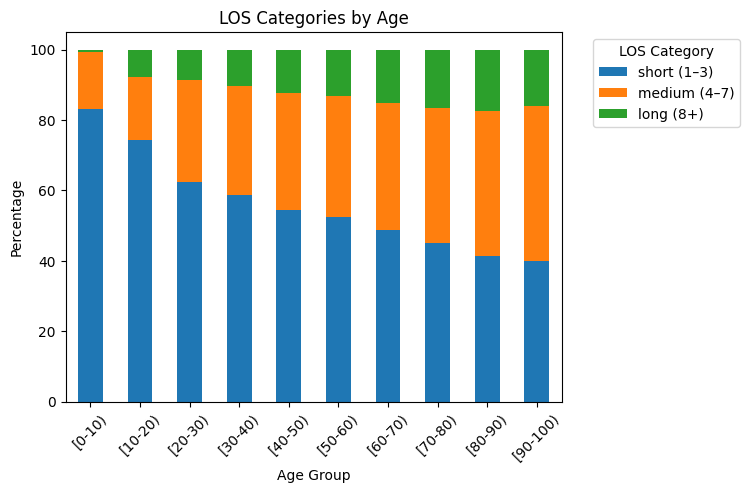

In [ ]:
#Here we explore the relationship between los and age
age_order = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)',
             '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']
age_los_cross = pd.crosstab(df["age"], df["los_bin"], normalize='index') * 100
age_los_cross_ordered = age_los_cross.reindex([age for age in age_order if age in age_los_cross.index])
age_los_cross_ordered.plot(kind='bar', stacked=True, ax=plt.gca())
plt.xlabel("Age Group")
plt.ylabel("Percentage")
plt.title("LOS Categories by Age")
plt.xticks(rotation=45)
plt.legend(title="LOS Category", bbox_to_anchor=(1.05, 1), loc='upper left')

Clear age-related pattern can be seen. There is dramatic shift from short stays in young patients to longer stays in older patients.

It is within expectation since normally older patients require longer recovery time and thus longer length of stay.

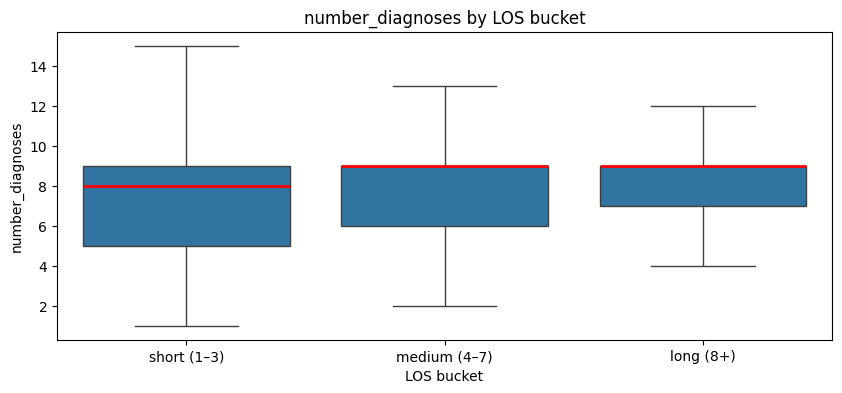

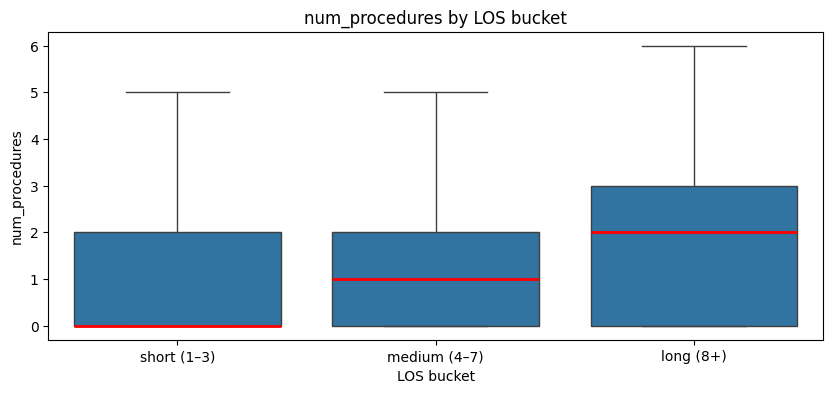

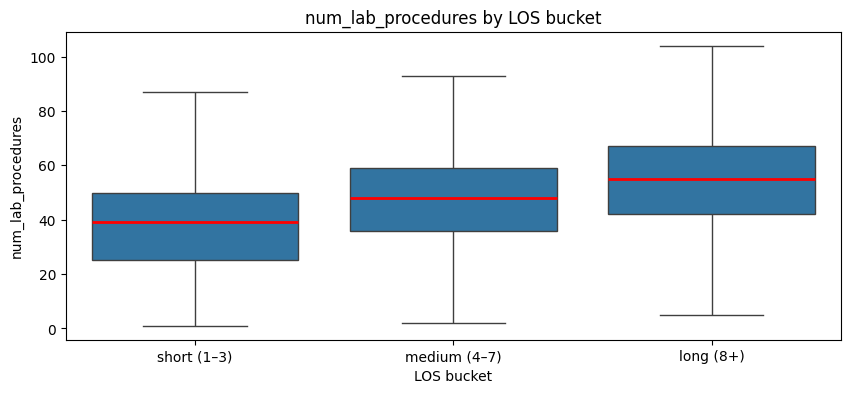

In [ ]:
ƒ# we try to explore more factors using iteration
drivers = ["number_diagnoses","num_procedures","num_lab_procedures"]

for col in drivers:
    plt.figure(figsize=(10,4))

    if df[col].dtype.kind in "iufc":
        sns.boxplot(
            x="los_bin",
            y=col,
            data=df,
            showfliers=False,
            medianprops={"color": "red", "linewidth": 2}
        )
        plt.title(f"{col} by LOS bucket")
        plt.xlabel("LOS bucket")
        plt.show()

    else:
        sns.countplot(x=col, hue="los_bin", data=df)
        plt.title(f"LOS bucket distribution across {col}")
        plt.show()

Boxplot analysis shows that several clinical indicators **increase** with hospital length of stay (LOS).

The number of diagnoses, procedures, and lab tests all increase progressively across short (1–3 days), medium (4–7 days), and long (≥8 days) stays. This suggests that longer hospitalizations are associated with greater treatment complexity and diagnostic intensity.

In [ ]:
(100*pd.crosstab(df["los_bin"], df["readmit_30"], normalize=0)).round(2)

readmit_30,0,1
los_bin,,
short (1–3),90.31,9.69
medium (4–7),87.81,12.19
long (8+),86.63,13.37


Above reveals a clear upward trend: patients with short stays had the lowest readmission rate at 9.7%, while medium-stay patients had 12.2% and long-stay patients reached 13.4%.

**This suggests that prolonged hospitalizations are associated with higher likelihood of readmission**, potentially reflecting greater disease severity or complications requiring extended care.